In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from pathlib import Path

colors = ["#E69F00" ,"#009E73" ,"#0072B2" ,"#999999", "#56B4E9", "#F0E442", "#CC79A7", "#D55E00"]
markers = ["v", "x", "o", "^", "s", "<", ">", "8"]

plt.rcParams.update({
        'font.size': '18',
        'svg.fonttype': 'none'
})

plt.rc('axes', axisbelow=True)

%config Completer.use_jedi = False

In [3]:
def make_line_chart(x,y, labels, xlabel="", ylabel="", name="result.png", legend_location="best", ncol=4, columnspacing=2):
    linewidth = 2
    fig = plt.subplots(figsize =(6, 2.5))

    plt.minorticks_on()
    
    plt.grid(color='lightgrey', linestyle='-', linewidth=1, which="minor")
    plt.grid(color='grey', linestyle='-', linewidth=1, which="major")
    
    for x_values, y_values, label, color in zip(x, y, labels, colors):
        plt.plot(x_values, y_values, label=label, linewidth=linewidth, color=color)
        
        
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: int(t[0]) if t[0].isnumeric() else math.inf))
    if legend_location == "upper center":
        ncol = ncol
        height = (len(lables) / ncol + 1) * 0.2 + 1
        plt.legend(handles, labels, frameon=False, ncol=ncol, loc="upper center", bbox_to_anchor=(0.5,height), fontsize=14 ,labelspacing=1, columnspacing=columnspacing)
    else:        
        plt.legend(handles, labels, frameon=False, loc="lower right", bbox_to_anchor=(0.85,0), fontsize=10 ,labelspacing=1, columnspacing=columnspacing)
    
    plt.savefig(name, bbox_inches='tight')
    plt.show()
    

In [4]:
def add_labels(x,y, precision):
    overset = 0.1 * max(y)
    for i in range(len(x)):
        if precision == -1:
            plt.text(i + 0.25, y[i] + overset, round(y[i]), ha = 'center')
        else:
            plt.text(i + 0.25, y[i] + overset, round(y[i], precision), ha = 'center')

In [5]:
def make_bar_chart(x,y, xlabel="", ylabel="", name="result.png", lables=True, lableprecision=-1):
    barWidth = 0.25
    fig, ax = plt.subplots(figsize =(6, 2.5))
    
    plt.minorticks_on()
    
    plt.grid(color='lightgrey', linestyle='-', linewidth=1, which="minor", axis="y")
    plt.grid(color='grey', linestyle='-', linewidth=1, which="major", axis="y")
        
    y = [val for _,val in sorted(zip(x,y))]
    x.sort()
    
    x = [str(int(i)) if not pd.isna(i) else "Never" for i in x]

    
    num_elements_in_x = len(x)

    # Set position of bar on X axis\n",
    br1 = list(map(lambda x: x + barWidth, np.arange(num_elements_in_x)))

    # Make the plot\n",
    plt.bar(br1, y, color=colors, width=barWidth,edgecolor ='black')
    
    if lables:
        add_labels(br1, y, lableprecision)
    
    # Adding Xticks\n",
    plt.xlabel(xlabel)
    plt.xticks([r + barWidth for r in range(num_elements_in_x)], x, minor=False)
    plt.gca().xaxis.set_minor_locator(tck.NullLocator())
    
    plt.ylabel(ylabel)

    ylim_max = max(y) * 1.3
    plt.gca().set_ylim(None, ylim_max)

    plt.savefig(name, bbox_inches='tight')
    plt.show()
    

In [20]:
def combine_column_and_file_name(column, file):
    return f'{file}_{column}'

In [19]:
def get_data(columns: list[str]):
    base_dir = Path('../experiment/final')
    csv_files = base_dir.glob('*.csv')
    
    dfs = {file.name : pd.read_csv(file) for file in csv_files}
    
    res_df = pd.DataFrame()
    for file_name, df in dfs.items():
        for column in columns:
            if column in df.columns:
                res_df[combine_column_and_file_name(file_name, column)] = df[column]
    return res_df

,validate.BSD100.psnr_scale_2_rfdn_advanced_600_epochs_no_batchnorm_pruning_512.csv,Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_512.csv,validate.BSD100.psnr_scale_2_rfdn_advanced_600_epochs_no_batchnorm_pruning_256.csv,Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_256.csv,validate.BSD100.psnr_scale_2_rfdn_advanced_600_epochs_no_batchnorm_pruning_128.csv,Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_128.csv,validate.BSD100.psnr_scale_2_rfdn_advanced_600_epochs_no_batchnorm_pruning_64.csv,Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_64.csv,validate.BSD100.psnr_scale_2_rfdn_advanced_600_epochs_no_batchnorm_pruning_32.csv,Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_32.csv,...,validate.BSD100.psnr_scale_2_rfdn_advanced_batchsize_2.csv,Epoch_rfdn_advanced_batchsize_2.csv,validate.BSD100.psnr_scale_2_rfdn_advanced_batchsize_32.csv,Epoch_rfdn_advanced_batchsize_32.csv,validate.BSD100.psnr_scale_2_rfdn_advanced_batchsize_4.csv,Epoch_rfdn_advanced_batchsize_4.csv,validate.BSD100.psnr_scale_2_rfdn_advanced_batchsize_64.csv,Epoch_rfdn_advanced_batchsize_64.csv,validate.BSD100.psnr_scale_2_rfdn_advanced_batchsize_8.csv,Epoch_rfdn_advanced_batchsize_8.csv
0,24.915600,1.0,24.920155,1.0,24.971610,1.0,24.918652,1.0,24.964062,1.0,...,28.712829,1.0,23.354594,1.0,28.634357,1.0,21.361633,1.0,28.043738,1.0
1,27.640627,2.0,27.511779,2.0,27.613771,2.0,27.624159,2.0,27.562637,2.0,...,29.030615,2.0,25.195679,2.0,28.972371,2.0,23.402738,2.0,28.767008,2.0
2,28.499629,3.0,28.511696,3.0,28.510866,3.0,28.507692,3.0,28.462854,3.0,...,29.193649,3.0,27.348171,3.0,29.098409,3.0,24.330820,3.0,28.914816,3.0
3,28.820583,4.0,28.811745,4.0,28.833357,4.0,28.812188,4.0,28.812940,4.0,...,29.598712,4.0,28.368428,4.0,29.468512,4.0,25.281856,4.0,29.040610,4.0
4,28.951146,5.0,28.949492,5.0,28.984157,5.0,29.018170,5.0,29.029472,5.0,...,29.757564,5.0,28.678149,5.0,29.692334,5.0,26.328736,5.0,29.145673,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,30.463720,596.0,30.425443,596.0,30.410838,596.0,30.330705,596.0,30.342925,596.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,30.461159,597.0,30.428478,597.0,30.413903,597.0,30.335380,597.0,30.337302,597.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,30.466817,598.0,30.427417,598.0,30.415242,598.0,30.334592,598.0,30.333258,598.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,30.466124,599.0,30.428972,599.0,30.414175,599.0,30.327805,599.0,30.339802,599.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: not enough values to unpack (expected 2, got 0)

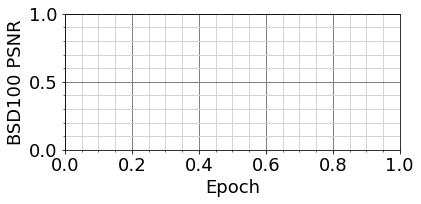

In [22]:
data = get_data(["validate.BSD100.psnr_scale_2", "Epoch"])
filtered_x = data.filter(regex=("Epoch_rfdn.*_600.csv")).head(300).transpose()
filtered_y = data.filter(regex=("validate\.BSD100.psnr_scale_2.*_600.csv")).head(300).transpose()
lables = ["RFDN", "RFDN + RepVgg - Batch Norm", "RFDN + RepVgg"]
make_line_chart(filtered_x.values, filtered_y.values, lables, "Epoch", "BSD100 PSNR", "epoch_psnr_scale.svg", legend_location="upper center", ncol=2, columnspacing=-10)

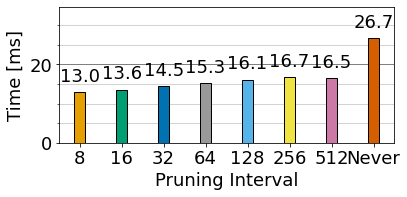

In [10]:
data = get_data(["validate.mean_forward_pass_time", "config.pruning_interval"])
filtered_y = data.filter(regex=("validate\.mean_forward_pass_time_rfdn_advanced_600_epochs_no_batchnorm_pruning_([0-9]*|none).csv")).mean()
filtered_x = data.filter(regex=("config\.pruning_interval_rfdn_advanced_600_epochs_no_batchnorm_pruning_([0-9]*|none).csv")).head(1)
make_bar_chart(filtered_x.values[0], filtered_y.values * 1000, "Pruning Interval", "Time [ms]", "pruning_interval_average_validation_time.svg", True, lableprecision=1)

[512. 256. 128.  64.  32.  16.   8.  nan]


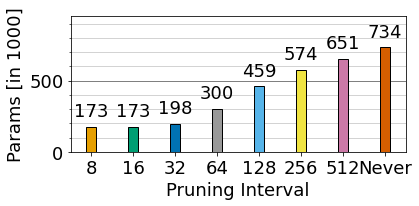

In [12]:
data = get_data(["num_parameters", "config.pruning_interval"])
filtered_y = data.filter(regex=("num_parameters_rfdn_advanced_600_epochs_no_batchnorm_pruning_([0-9]*|none).csv")).min()
filtered_x = data.filter(regex=("config\.pruning_interval_rfdn_advanced_600_epochs_no_batchnorm_pruning_([0-9]*|none).csv")).head(1)
print(filtered_x.values[0])
make_bar_chart(filtered_x.values[0], filtered_y.values / 1000, "Pruning Interval", "Params [in 1000]", "pruning_interval_final_number_of_parameters.svg", True, lableprecision=-1)

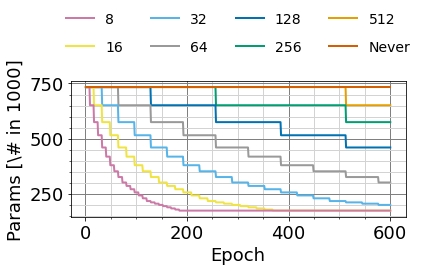

In [54]:
data = get_data(["num_parameters", "Epoch"])
filtered_x = data.filter(regex=("Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_([0-9]*|none).csv")).head(600).transpose()
filtered_y = data.filter(regex=("num_parameters_rfdn_advanced_600_epochs_no_batchnorm_pruning_([0-9]*|none).csv")).head(600).transpose()
lables = [512, 256, 128, 64, 32, 16, 8, "Never"]
make_line_chart(filtered_x.values, filtered_y.values / 1000, lables, "Epoch", "Params [\# in 1000]", "pruning_interval_number_of_parameters.svg", legend_location="upper center")

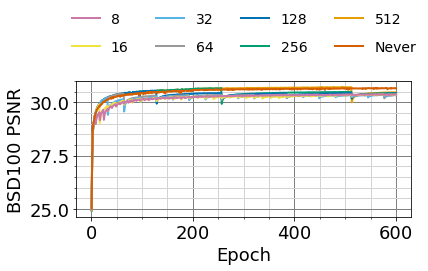

In [17]:
data = get_data(["validate.BSD100.psnr_scale_2", "Epoch"])
filtered_x = data.filter(regex=("Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_([0-9]*|none).csv")).head(600).transpose()
filtered_y = data.filter(regex=("validate\.BSD100.psnr_scale_2_rfdn_advanced_600_epochs_no_batchnorm_pruning_([0-9]*|none).csv")).head(600).transpose()
lables = [512, 256, 128, 64, 32, 16, 8, "Never"]
make_line_chart(filtered_x.values, filtered_y.values, lables, "Epoch", "BSD100 PSNR", "pruning_interval_BSD100_psnr.svg", legend_location="upper center")

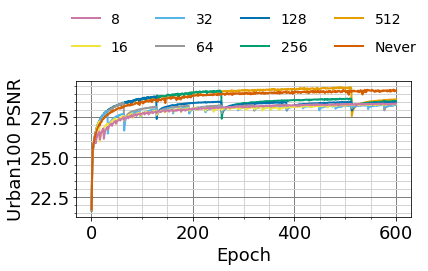

In [16]:
data = get_data(["validate.Urban100.psnr_scale_2", "Epoch"])
filtered_x = data.filter(regex=("Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_([0-9]*|none).csv")).head(600).transpose()
filtered_y = data.filter(regex=("validate\.Urban100.psnr_scale_2_rfdn_advanced_600_epochs_no_batchnorm_pruning_([0-9]*|none).csv")).head(600).transpose()
lables = [512, 256, 128, 64, 32, 16, 8, "Never"]
make_line_chart(filtered_x.values, filtered_y.values, lables, "Epoch", "Urban100 PSNR", "pruning_interval_Urban100_psnr.svg", legend_location="upper center")

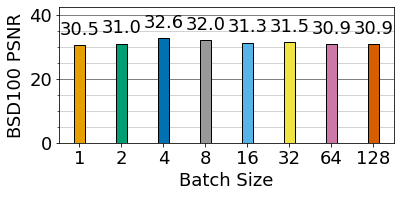

In [ ]:
data = get_data(["test.BSD100.psnr_scale_2", "config.batch_size_test"])
filtered_y = data.filter(regex=("test\.BSD100\.psnr_scale_2_rfdn_advanced_batch_size_test.*")).head(1)
filtered_x = data.filter(regex=("config\.batch_size_test_rfdn_advanced_batch_size_test.*")).head(1)
make_bar_chart(filtered_x.values[0], filtered_y.values[0], "Batch Size", "BSD100 PSNR", "batch_size_test_BSD100_PSNR.svg", True, lableprecision=1)

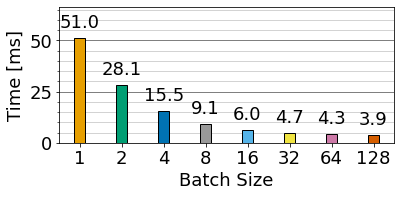

In [29]:
data = get_data(["train.time", "config.batch_size"])
filtered_y = data.filter(regex=("train\.time_rfdn_advanced_batchsize*")).mean()
filtered_x = data.filter(regex=("config\.batch_size_rfdn_advanced_batchsize.*")).head(1)
make_bar_chart(filtered_x.values[0], filtered_y.values * 1000, "Batch Size", "Time [ms]", "batch_size_average_validation_time.svg", True, lableprecision=1)

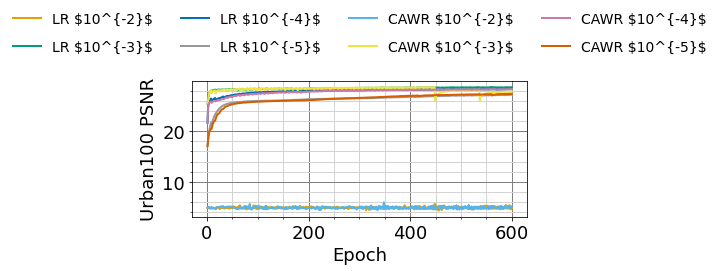

In [109]:
data = get_data(["validate.Urban100.psnr_scale_2", "Epoch"])
filtered_x = data.filter(regex=("Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_[0-9]+_(cawr_lr|lr)_.*.csv")).head(600).transpose()
filtered_y = data.filter(regex=("validate\.Urban100.psnr_scale_2_rfdn_advanced_600_epochs_no_batchnorm_pruning_[0-9]+_(cawr_lr|lr)_.*.csv")).head(600).transpose()
lables = ["LR \$10^{-2}\$", "LR \$10^{-3}\$", "LR \$10^{-4}\$", "LR \$10^{-5}\$", "CAWR \$10^{-2}\$", "CAWR \$10^{-3}\$", "CAWR \$10^{-4}\$", "CAWR \$10^{-5}\$"]
make_line_chart(filtered_x.values, filtered_y.values, lables, "Epoch", "Urban100 PSNR", "epoch_Urban100_psnr.svg", legend_location="upper center", ncol=4)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_8_cawr_lr_3_5.csv,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_8_lr_3_5.csv,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0


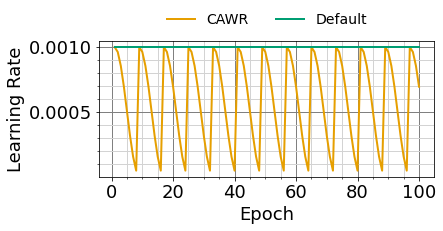

In [103]:
data = get_data(["lr", "Epoch"])
filtered_x = data.filter(items=["Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_8_cawr_lr_3_5.csv", "Epoch_rfdn_advanced_600_epochs_no_batchnorm_pruning_8_lr_3_5.csv"]).head(100).transpose()
filtered_y = data.filter(items=["lr_rfdn_advanced_600_epochs_no_batchnorm_pruning_8_cawr_lr_3_5.csv", "lr_rfdn_advanced_600_epochs_no_batchnorm_pruning_8_lr_3_5.csv"]).head(100).transpose()
display(filtered_x)
lables = ["CAWR", "Default"]
make_line_chart(filtered_x.values, filtered_y.values, lables, "Epoch", "Learning Rate", "epoch_lr_cawr.svg", legend_location="upper center")

In [60]:
data = get_data(["num_parameters", "test.BSD100.psnr_scale_2", "test.BSD100.psnr_scale_3", "test.BSD100.psnr_scale_4", "test.Urban100.psnr_scale_2", "test.Urban100.psnr_scale_3", "test.Urban100.psnr_scale_4", "test.Set5.psnr_scale_2", "test.Set5.psnr_scale_3", "test.Set5.psnr_scale_4", "test.Set14.psnr_scale_2", "test.Set14.psnr_scale_3", "test.Set14.psnr_scale_4", "test.BSD100.ssim_scale_2", "test.BSD100.ssim_scale_3", "test.BSD100.ssim_scale_4", "test.Urban100.ssim_scale_2", "test.Urban100.ssim_scale_3", "test.Urban100.ssim_scale_4", "test.Set5.ssim_scale_2", "test.Set5.ssim_scale_3", "test.Set5.ssim_scale_4", "test.Set14.ssim_scale_2", "test.Set14.ssim_scale_3", "test.Set14.ssim_scale_4"])
num_parameters = data.filter(regex=("num_parameters_.*")).min().transpose()

psnrBSD100 = data.filter(regex=("test\.BSD100\.psnr_scale_.*")).max().transpose()
psnrUrban100 = data.filter(regex=("test\.Urban100\.psnr_scale_.*")).max().transpose()
psnrSet5 = data.filter(regex=("test\.Set5\.psnr_scale_.*")).max().transpose()
psnrSet14 = data.filter(regex=("test\.Set14\.psnr_scale_.*")).max().transpose()

ssimBSD100 = data.filter(regex=("test\.BSD100\.ssim_scale_.*")).max().transpose()
ssimUrban100 = data.filter(regex=("test\.Urban100\.ssim_scale_.*")).max().transpose()
ssimSet5 = data.filter(regex=("test\.Set5\.ssim_scale_.*")).max().transpose()
ssimSet14 = data.filter(regex=("test\.Set14\.ssim_scale_.*")).max().transpose()

display((num_parameters / 1000).round().astype(int))

display(psnrBSD100.round(2))
display(psnrUrban100.round(2))
display(psnrSet5.round(2))
display(psnrSet14.round(2))

display(ssimBSD100.round(4))
display(ssimUrban100.round(4))
display(ssimSet5.round(4))
display(ssimSet14.round(4))

num_parameters_rfdn_advanced_batchnorm_final_2x_09.csv    737
num_parameters_rfdn_advanced_final_2x_09.csv              734
num_parameters_rfdn_advanced_final_3x_09.csv              742
num_parameters_rfdn_advanced_pruning_final_2x_09.csv      173
num_parameters_rfdn_advanced_pruning_final_3x_09.csv      181
num_parameters_rfdn_final_2x_09.csv                       684
dtype: int64

test.BSD100.psnr_scale_2_rfdn_advanced_batchnorm_final_2x_09.csv    30.80
test.BSD100.psnr_scale_2_rfdn_advanced_final_2x_09.csv              30.60
test.BSD100.psnr_scale_3_rfdn_advanced_final_3x_09.csv              26.59
test.BSD100.psnr_scale_2_rfdn_advanced_pruning_final_2x_09.csv      30.28
test.BSD100.psnr_scale_3_rfdn_advanced_pruning_final_3x_09.csv      26.47
test.BSD100.psnr_scale_2_rfdn_final_2x_09.csv                       30.81
dtype: float64

test.Urban100.psnr_scale_2_rfdn_advanced_batchnorm_final_2x_09.csv    29.90
test.Urban100.psnr_scale_2_rfdn_advanced_final_2x_09.csv              29.46
test.Urban100.psnr_scale_3_rfdn_advanced_final_3x_09.csv              24.68
test.Urban100.psnr_scale_2_rfdn_advanced_pruning_final_2x_09.csv      28.22
test.Urban100.psnr_scale_3_rfdn_advanced_pruning_final_3x_09.csv      24.26
test.Urban100.psnr_scale_2_rfdn_final_2x_09.csv                       29.89
dtype: float64

test.Set5.psnr_scale_2_rfdn_advanced_batchnorm_final_2x_09.csv    35.73
test.Set5.psnr_scale_2_rfdn_advanced_final_2x_09.csv              35.42
test.Set5.psnr_scale_3_rfdn_advanced_final_3x_09.csv              31.90
test.Set5.psnr_scale_2_rfdn_advanced_pruning_final_2x_09.csv      35.04
test.Set5.psnr_scale_3_rfdn_advanced_pruning_final_3x_09.csv      31.40
test.Set5.psnr_scale_2_rfdn_final_2x_09.csv                       35.72
dtype: float64

Series([], dtype: float64)

test.BSD100.ssim_scale_2_rfdn_advanced_batchnorm_final_2x_09.csv    0.9010
test.BSD100.ssim_scale_2_rfdn_advanced_final_2x_09.csv              0.8983
test.BSD100.ssim_scale_3_rfdn_advanced_final_3x_09.csv              0.7864
test.BSD100.ssim_scale_2_rfdn_advanced_pruning_final_2x_09.csv      0.8939
test.BSD100.ssim_scale_3_rfdn_advanced_pruning_final_3x_09.csv      0.7820
test.BSD100.ssim_scale_2_rfdn_final_2x_09.csv                       0.9013
dtype: float64

test.Urban100.ssim_scale_2_rfdn_advanced_batchnorm_final_2x_09.csv    0.9310
test.Urban100.ssim_scale_2_rfdn_advanced_final_2x_09.csv              0.9258
test.Urban100.ssim_scale_3_rfdn_advanced_final_3x_09.csv              0.8187
test.Urban100.ssim_scale_2_rfdn_advanced_pruning_final_2x_09.csv      0.9105
test.Urban100.ssim_scale_3_rfdn_advanced_pruning_final_3x_09.csv      0.8061
test.Urban100.ssim_scale_2_rfdn_final_2x_09.csv                       0.9314
dtype: float64

test.Set5.ssim_scale_2_rfdn_advanced_batchnorm_final_2x_09.csv    0.9500
test.Set5.ssim_scale_2_rfdn_advanced_final_2x_09.csv              0.9483
test.Set5.ssim_scale_3_rfdn_advanced_final_3x_09.csv              0.9091
test.Set5.ssim_scale_2_rfdn_advanced_pruning_final_2x_09.csv      0.9466
test.Set5.ssim_scale_3_rfdn_advanced_pruning_final_3x_09.csv      0.9038
test.Set5.ssim_scale_2_rfdn_final_2x_09.csv                       0.9501
dtype: float64

Series([], dtype: float64)